# <b>Pymaceuticals Inc.</b>
---

## <b>Analysis</b>
### <b>Observations or inferences that can be made from the data</b>
<b>1)</b> The mouse with id g989 had duplicate rows which were dropped, resulting into a total of 248 mice for downstream analyses<br>

<b>2)</b> From the summary statistics, it can be observed that Capomulin and Ramicane both have the lowest mean and median tumor volumes among the drug regimens, with mean tumor volumes of 40.68 mm³ and 40.22 mm³, respectively. These regimens also have the lowest standard deviations (Capomulin: 4.99, Ramicane: 4.85), indicating that the tumor sizes under these treatments are not only smaller on average but also more consistent and less variable across the treated mice compared to the other drugs.<br>
This suggests that Capomulin and Ramicane might be more effective at controlling tumor growth compared to the other treatments in the study.<br>

<b>3)</b> The gender distribution of the mice in the study was nearly balanced, with 50.4% being male and 49.6% female, indicating a well-proportioned representation of both sexes in the experimental groups.<br>

<b>4)</b> From the boxplots showing the distribution of the tumor volume for each treatment, it can be observed that:
- **Capomulin** and **Ramicane** regimens did not show any potential outliers, indicating that the tumor volumes in these regimens fell within a consistent range without extreme deviations.
- For the **Infubinol** regimen, there was **one potential outlier** with a tumor volume of **36.32 mm³**, which is below the lower bound of **36.83 mm³**. This suggests that while most of the tumor volumes were within a normal range, one mouse had a tumor volume that was notably smaller compared to the others under Infubinol.
  
   This indicates that **Capomulin and Ramicane** are consistent in their effects on tumor volume, while **Infubinol** shows more variability with at least one outlier.

<b>5)</b> From the corrrlation and regression plot it can be deduced that there is a strong positive correlation of **0.84** between the **weight of the mice** and the **average tumor volume** - suggesting that **heavier mice tend to have larger tumors**. This indicates a significant relationship where tumor growth may be influenced by the weight of the mouse, or alternatively, that mice with larger tumors might gain weight as a result of their condition or treatment. This finding could provide valuable insights into how body mass relates to tumor progression, particularly in the context of cancer research.

## <b>Python codes are shown below</b>

In [249]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [86]:
# Checking the number of mice.
print(combined_df["Mouse ID"].nunique())

249


In [120]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [121]:
# Optional: Get all the data for the duplicate mouse ID.
filter = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID']
duplicates = combined_df[combined_df['Mouse ID'].isin(filter)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [122]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Identify duplicate 'Mouse ID'
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Drop rows where the 'Mouse ID' is duplicated
clean_df = combined_df[~combined_df['Mouse ID'].isin(duplicate_mice)]

# Display the clean DataFrame
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [123]:
# Checking the number of mice in the clean DataFrame.
#len(clean_df['Mouse ID'].unique())
clean_df['Mouse ID'].nunique()


248

## Summary Statistics

In [143]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_mean = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
summary_median = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
summary_var = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
summary_std = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
summary_sem = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
                                "Mean Tumor Volume" : summary_mean,
                                "Median Tumor Volume" : summary_median,
                                "Tumor Volume Variance" : summary_var,
                                "Tumor Volume Std. Dev." : summary_std,
                                "Tumor Volume Std. Err." : summary_sem,
                             }
                            )
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [131]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)" : 
                                                          ["mean", "median", "var", "std", "sem"  ]}
                                                       )

summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

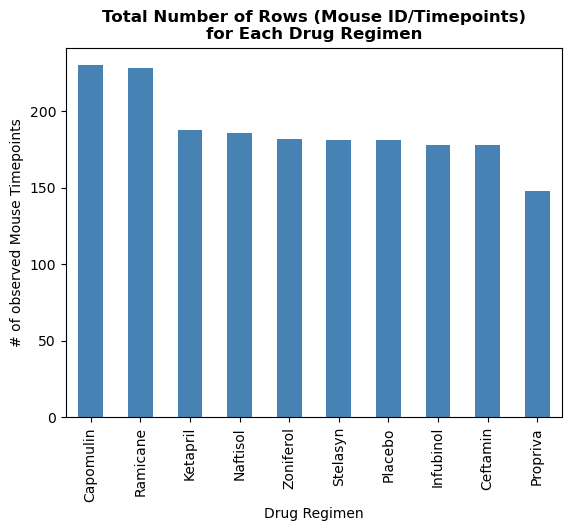

In [339]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group data by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints)
regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', color='steelblue')

# Add labels and title
plt.title('Total Number of Rows (Mouse ID/Timepoints)\nfor Each Drug Regimen', fontweight='bold')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')

# Show the plot
plt.show()



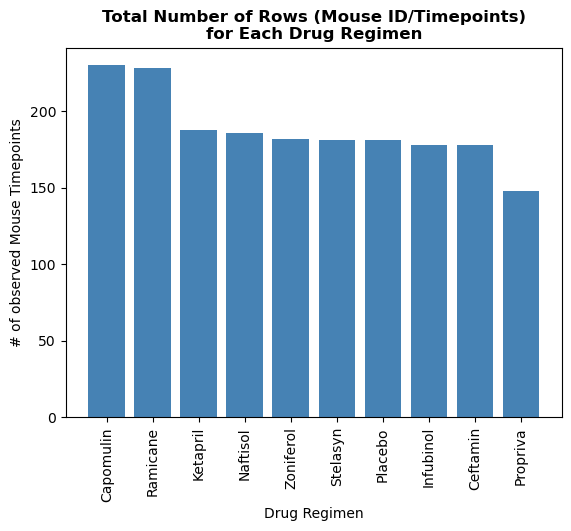

In [338]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints)
regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.bar(regimen_counts.index, regimen_counts.values, color='steelblue')

# Add labels and title
plt.title('Total Number of Rows (Mouse ID/Timepoints)\nfor Each Drug Regimen', fontweight='bold')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

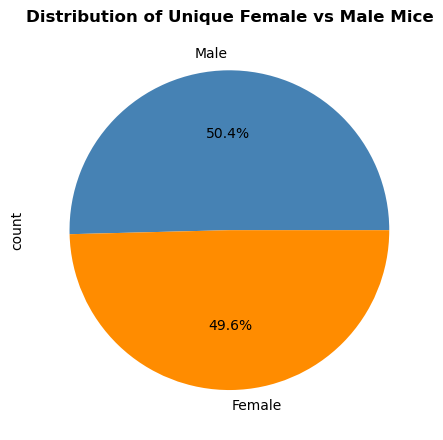

In [337]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Drop duplicate rows to get unique mice
unique_mice = clean_df.drop_duplicates(subset='Mouse ID')

# Count the unique occurrences of each gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart

# Set the figure size (width, height) in inches
plt.figure(figsize=(4.5, 4.5))

# Create a pie chart using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['steelblue', 'darkorange'])

# Add a title
plt.title('Distribution of Unique Female vs Male Mice', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()




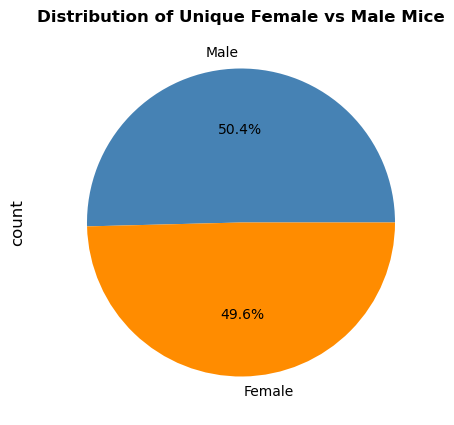

In [336]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Drop duplicate rows to get unique mice by 'Mouse ID'
unique_mice = clean_df.drop_duplicates(subset='Mouse ID')

# Count the unique occurrences of each gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart

# Set the figure size (width, height) in inches
plt.figure(figsize=(5, 5))

# Create a pie chart using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=0, colors=['steelblue', 'darkorange'])

# Add a title
plt.title('Distribution of Unique Female vs Male Mice', fontweight='bold')

# Add label count
plt.text(-1.5, 0, 'count', fontsize=12, rotation=90, verticalalignment='center')

# Show the plot
plt.show()




## Quartiles, Outliers and Boxplots

In [212]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge this group with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Step 3: Filter the data to include only the four drug regimens of interest (Capomulin, Ramicane, Infubinol, Ceftamin)
filtered_final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the filtered final tumor volume DataFrame
filtered_final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [310]:
# Put treatments into a list for for loop (and later for plot labels)

treatments= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_subset = filtered_final_tumor_volume_df[filtered_final_tumor_volume_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(drug_subset)

    # Determine outliers using upper and lower bounds
    # Calculate the quartiles and IQR
    quartiles = drug_subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine lower and upper bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Identify potential outliers
    outliers = drug_subset[(drug_subset < lower_bound) | (drug_subset > upper_bound)]
    
    #print the results
    # print(f'{drug} Regimen:')
    # print(f'Lower Quartile: {lowerq}')
    # print(f'Upper Quartile: {upperq}')
    # print(f'IQR: {iqr}')
    # print(f'Lower Bound: {lower_bound}')
    # print(f'Upper Bound: {upper_bound}')
    # print(f'Potential outliers: {outliers.tolist()}\n')
    print(f'{drug} s potential outliers: {outliers}')
    


Capomulin s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol s potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


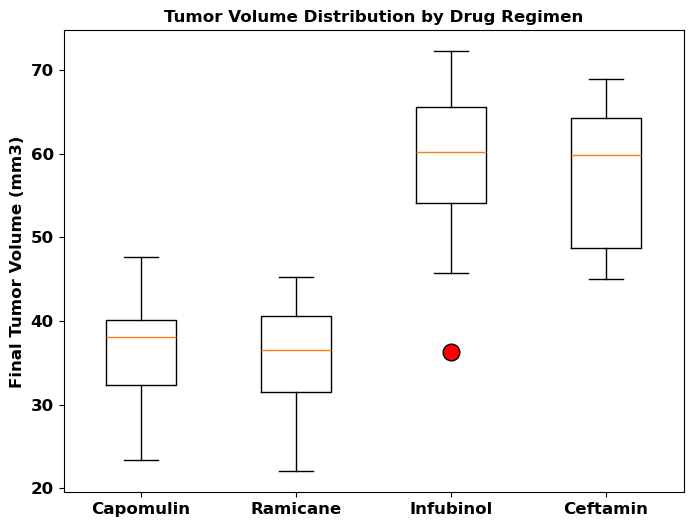

In [335]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Customize the flier (outlier) properties
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')

plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)

# Add title and labels
plt.title('Tumor Volume Distribution by Drug Regimen', fontweight='bold')
plt.ylabel('Final Tumor Volume (mm3)',fontsize=12,fontweight='bold' )

# Increase the font size of the tick labels
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')

# Show the plot
plt.show()

## Line and Scatter Plots

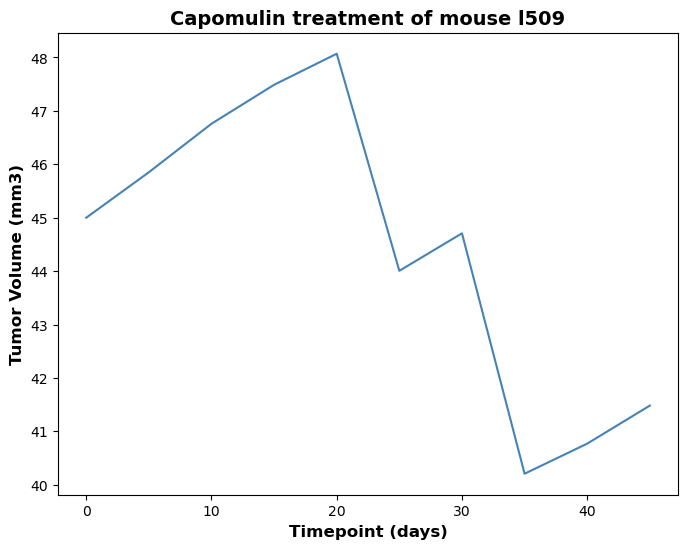

In [300]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin
mouse_id = 'l509'  # The specific mouse ID you want to plot
capomulin_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]
#capomulin_data
# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker=' ', linestyle='-', color='steelblue')

# Add labels and title
plt.title(f"Capomulin treatment of mouse {mouse_id}", fontsize=14, fontweight='bold')
plt.xlabel("Timepoint (days)", fontsize=12, fontweight='bold')
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontweight='bold')

# Show the plot
plt.show()

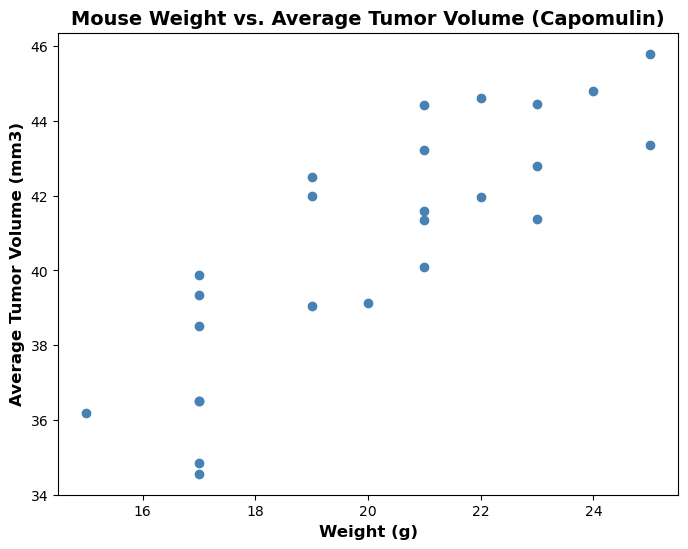

In [331]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the unique weight for each mouse (assumes each mouse has a consistent weight)
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].first()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_vol, color='steelblue')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)', fontsize=14, fontweight='bold')
plt.xlabel('Weight (g)', fontsize=12, fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12, fontweight='bold')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is : 0.84


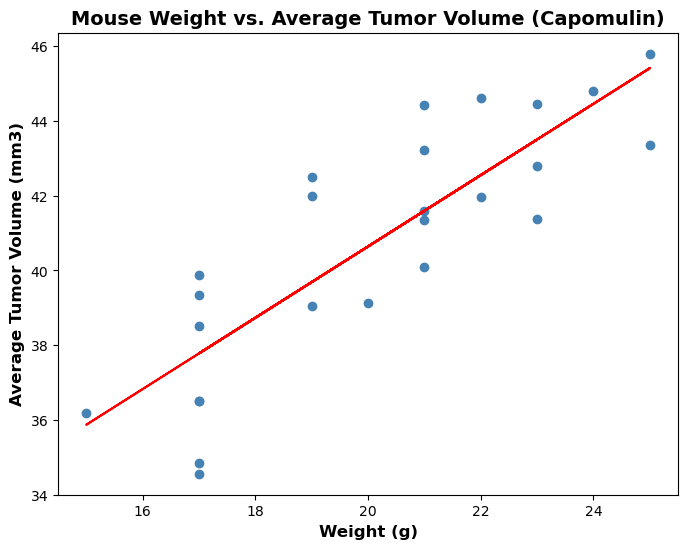

In [332]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = avg_tumor_vol.corr(mouse_weight)
print("The correlation between mouse weight and the average tumor volume is :",round(correlation,2))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_vol)

# Print the regression results
#print(f"Slope: {slope}")
#print(f"Intercept: {intercept}")
#print(f"R-squared: {r_value**2}")

# Plot the data points and the linear regression model
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_vol, color='steelblue', label='Data Points')
plt.plot(mouse_weight, intercept + slope * mouse_weight, 'r-', label='Fitted Line')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)', fontsize=14, fontweight='bold')
plt.xlabel('Weight (g)', fontsize=12, fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12, fontweight='bold')

# Add grid and legend
#plt.legend()

# Show the plot
plt.show()

